# Binary Classification pipeline: Application with text data

Author: Alexandre Gramfort

The objective of this hands on session is to setup a predictive pipeline to classify movie critics. Critics are either positive (y=1) or negative (y=0). This task is often referred to as **sentiment analysis**.

In [12]:
%matplotlib inline

In [13]:
import os.path as op
import numpy as np
import matplotlib.pyplot as plt

What you are being given :

- critics of movies in text files in folder *data/imdb1*,

Your mission :

- Extract numeric features (the 'X') from the raw data (word counts)
- Apply a Logistic Regression classifier with proper setup of hyperparameter
- Evaluate performance in terms of accuracy with cross-validation
- Answer the question "Do I have enough data?" using a learning curve.

### First let's load the raw data

In [14]:
from glob import glob  # similar to --> ls *.txt 
filenames_neg = sorted(glob(op.join('data', 'imdb1', 'neg', '*.txt')))  # glob retorune list non retournée. 1 commentaire par fichier
filenames_pos = sorted(glob(op.join('data', 'imdb1', 'pos', '*.txt')))

texts_neg = [open(f).read() for f in filenames_neg]
texts_pos = [open(f).read() for f in filenames_pos]
texts = texts_neg + texts_pos
y = np.ones(len(texts), dtype=np.int)
y[:len(texts_neg)] = 0.
# le fait d etre positif ou negatif correspond à un label qu'on a fabriquer par le code ci dessus 

print("%d documents" % len(texts))
print("Number of positives %s and negatives %s" % (len(texts_pos), len(texts_neg)))

2000 documents
Number of positives 1000 and negatives 1000


### Questions:

- What does the array `y` correspond to?
- What is the type of the variables `texts`?
- Can you read the first text?
- Complete the function **count_words** that counts the number of occurences of each word in a list of texts. You'll need to use the *split* method from the string class to split a text in words.

Example of usage of the `split` function:

In [4]:
# y contient des 0 et des 1
type(texts)

list

In [5]:
print(texts[0])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [15]:
this_text = texts[0]
this_text.split()

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.',
 'they',
 'get',
 'into',
 'an',
 'accident',
 '.',
 'one',
 'of',
 'the',
 'guys',
 'dies',
 ',',
 'but',
 'his',
 'girlfriend',
 'continues',
 'to',
 'see',
 'him',
 'in',
 'her',
 'life',
 ',',
 'and',
 'has',
 'nightmares',
 '.',
 "what's",
 'the',
 'deal',
 '?',
 'watch',
 'the',
 'movie',
 'and',
 '"',
 'sorta',
 '"',
 'find',
 'out',
 '.',
 '.',
 '.',
 'critique',
 ':',
 'a',
 'mind-fuck',
 'movie',
 'for',
 'the',
 'teen',
 'generation',
 'that',
 'touches',
 'on',
 'a',
 'very',
 'cool',
 'idea',
 ',',
 'but',
 'presents',
 'it',
 'in',
 'a',
 'very',
 'bad',
 'package',
 '.',
 'which',
 'is',
 'what',
 'makes',
 'this',
 'review',
 'an',
 'even',
 'harder',
 'one',
 'to',
 'write',
 ',',
 'since',
 'i',
 'generally',
 'applaud',
 'films',
 'which',
 'attempt',
 'to',
 'break',
 'the',
 'mold',
 ',',
 'mess',
 'with',
 'your',
 'head',
 'and',
 

In [16]:
words = "Hello DSSP attendees!".split()
print(words)
print("number of words : %s" % len(words))

['Hello', 'DSSP', 'attendees!']
number of words : 3


Example of usage of the `count_words` function:

```
>>> some_texts = ['A B B', 'B', 'A A']
>>> vocabulary, counts = count_words(some_texts)
>>> print(vocabulary)  # dictionary word -> column index
{'A': 0, 'B': 1}
>>> print(counts)  # number of occurence of each word from vocabulary in each text
[[ 1.  2.]
 [ 0.  1.]
 [ 2.  0.]]
```

**Remark:** The vocabularty is a `dict` and its values have nothing to do with a number of occurences. Its values are the indices of columns in the `counts`.

In [ ]:
def count_words(texts):
    """Vectorize text : return count of each word in the text snippets
    Parameters
    ----------
    texts : list of str
        The texts
    Returns
    -------
    vocabulary : dict
        A dictionary that points to an index in counts for each word.
    counts : ndarray, shape (n_samples, n_features)
        The counts of each word in each text.
        n_samples == number of documents.
        n_features == number of words in vocabulary.
    """
    # Strat 1
    if 0:
        vocabulary = dict()
        n_words = 0
        for text in texts:
            words = text.split()
            for word in words:
                if word not in vocabulary:
                    vocabulary[word] = n_words
                    n_words += 1
    # Strat 2
    all_words = []
    for text in texts:
        all_words += text.split()
    unique_words = np.unique(all_words)
    vocabulary = dict()
    n_words = 0
    for w in unique_words:
        vocabulary[w] = n_words
        n_words += 1
    counts = 
#    vocabulary = None
    return vocabulary, counts
some_texts = ['A B B', 'B', 'A A']
count_words(some_texts)

In [20]:
%%time

def count_words(texts):
    """Vectorize text : return count of each word in the text snippets

    Parameters
    ----------
    texts : list of str
        The texts

    Returns
    -------
    vocabulary : dict
        A dictionary that points to an index in counts for each word.
    counts : ndarray, shape (n_samples, n_features)
        The counts of each word in each text.
        n_samples == number of documents.
        n_features == number of words in vocabulary.
    """
    vocabulary = dict()
    word_index = 0
    
    # Build the dictionary resulting from all texts
    for current_text in range(len(texts)) :
        words = texts[current_text].split()
        # Build the dictionary resulting from a single text
        for any_word in words:
            if any_word not in vocabulary.keys() :
                vocabulary[any_word] = word_index
                word_index += 1
    
    # Build the np.array(i -> text number, j -> occurence count of vocabulary.get(word) )  
    counts = np.zeros((len(texts), len(vocabulary)), dtype=np.int32)
    for current_text in range(len(texts)) :
        words = texts[current_text].split()
        for any_word in words:
            counts[current_text, vocabulary.get(any_word) ] += 1

        
    # TODO
    return vocabulary, counts

vocabulary, counts = count_words(texts)
print(counts.shape)
print(counts.sum())

(2000, 50920)
1492681
Wall time: 1.28 s


### Questions

- Estimate Logistic regression on the full data. Show the effect of overfitting by evaluating the predictive power of your method in terms of accuracy.
- Use the `train_test_split` function split the data in train and test (80% train and 20% test). What performance do you get?
- Can you do better by adjusting the regularization parameter C? Use values between 0.00001 and 1000.
- Why is this potentially dangerous? How do you avoid troubles?

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#clf = LogisticRegression(C=1.)
clf = LogisticRegression(solver='liblinear', C=1.)  
# C correspond à la regularization. Elle empeche le modèle d'avoir trop de paramètres de libertes, cà d trop de variance.
# Pour limiter cette variance, il faut la biaiser, càd ajouter un param de regularization
#
# Regularization technique is based on the fact that if the highest order terms in a polynomial equation have very small coefficients, 
# then the function will approximately behave like a polynomial function of a smaller degree.

clf.fit(counts, y)
np.mean(clf.predict(counts) == y)






1.0

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# TODO : Use the train_test_split function split the data in train and test (80% train and 20% test). What performance do you get?
X_train, X_test, y_train, y_test = train_test_split(counts, y, train_size=0.8, random_state=0)
clf = LogisticRegression(solver = 'liblinear',C=1.)
clf.fit(X_train,y_train)
np.mean(clf.predict(X_test)==y_test)


0.845

C : 1e-05 - Score : 0.585
C : 0.0001 - Score : 0.6625
C : 0.001 - Score : 0.765
C : 0.01 - Score : 0.8175
C : 0.1 - Score : 0.8275
C : 1.0 - Score : 0.8225
C : 10.0 - Score : 0.82
C : 100.0 - Score : 0.82
C : 1000.0 - Score : 0.8175
-----------------
Best C : 0.1 - Best Score : 0.8275


Text(0, 0.5, 'Accuracy')

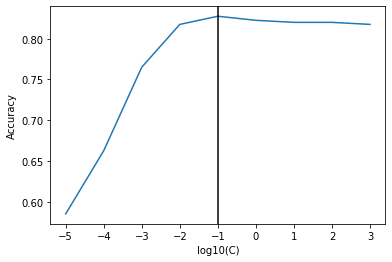

In [26]:
# Can you do better by adjusting the regularization parameter C? Use values between 0.00001 and 1000
# log(10) = 1 / log(1000) = 3 / log(10 puiss n) = n  / log(0.1) = -1 / ...
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 10., 100., 1000.]
scores = []
for C in Cs:
    clf.C = C
    score = clf.fit(X_train, y_train).score(X_test, y_test)
    scores.append(score)
    print('C : %s - Score : %s' % (C, score))

print('-----------------')
C_best = Cs[np.argmax(scores)]
print('Best C : %s - Best Score : %s' % (C_best, np.max(scores)))
plt.plot(np.log10(Cs), scores)
plt.axvline(np.log10(C_best), color='k')
plt.xlabel("log10(C)")
plt.ylabel("Accuracy")

In [28]:
X_train, X_test, y_train, y_test = \
    train_test_split(counts, y, train_size=0.8, random_state=None)
clf.C = 0.01
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.86

### Questions

- Compare the performance of Logistic Regression vs Multinomial Nayes Bayes?

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

# TODO

### Questions

- Compare your implementation of word counting with scikit-learn.

For this use the classes *CountVectorizer* and a *Pipeline*:

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score  # replace by cross_validation
from sklearn.feature_extraction.text import TfidfTransformer

clf = Pipeline([
    ('vect', CountVectorizer(max_df=0.75, ngram_range=(1, 1),
                             analyzer='word', stop_words=None)),
    ('nb', MultinomialNB())
])

# TODO

### Questions

- Could do you better with more data? Is the model complex too complex or too simple? Hint: Use a learning curve

In [ ]:
from sklearn.model_selection import learning_curve

# TODO

### Questions

- Can you do better using bigrams? Use parameter `ngram_range=(1, 2)` in CountVectorizer
- Compare the learning curves using single words or bigrams

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer

clf = Pipeline([
    ('vect', CountVectorizer(max_df=0.75, ngram_range=(1, 2),
                             analyzer='word', stop_words=None)),
    ('nb', MultinomialNB())
])

# TODO